In [1]:
import os 
import re 
import json
import sys 
import random
%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append('C:/Users/mingy/Documents/wsd_ticker2')
from algorithm.ticker_wsd import TickerWSD
ticker_wsd = TickerWSD()

C:\Users\mingy\Anaconda3\envs\new_env2\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\mingy\Anaconda3\envs\new_env2\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\mingy\Anaconda3\envs\new_env2\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator LinearSVC from version 0.19.2 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
vectorizer = ticker_wsd.clf_model.vectorizer
clf = ticker_wsd.clf_model.model

In [4]:
features = vectorizer.vocabulary_
features = {features[k]:k for k in features}

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def plot_coefficients(classifier, features, top_features=15):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(20, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2*top_features), coef[top_coefficients], color=colors)
    feature_names = [features[idx] for idx in top_coefficients]
    plt.xticks(np.arange(1,  2*top_features+1), feature_names, rotation=60, ha='right')
    plt.show()

# Plot the most important Negative and Positive Features

This is a pretty disturbing graph:
- On negative side, a lot of stock related words 
    - spx dow
    - spy spx
- On positive side, top words are indeed stock symbols:
    - neo
    - spx
    - qqq

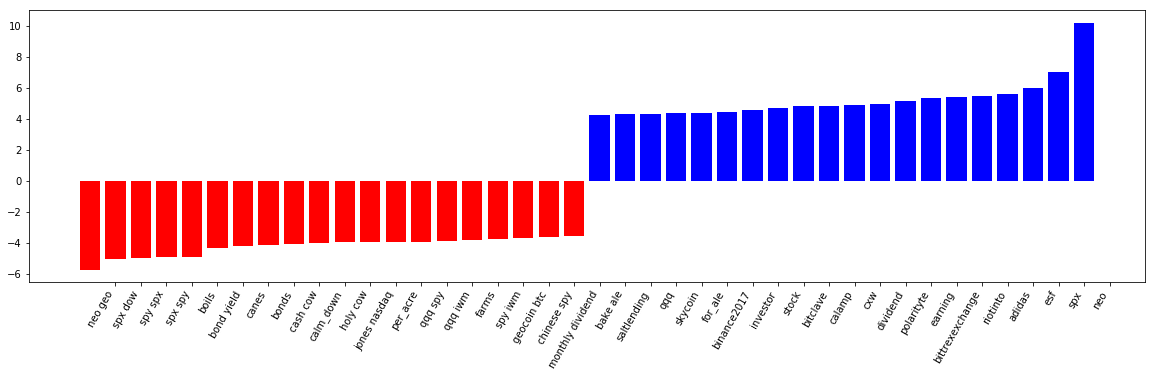

In [6]:
plot_coefficients(clf, features, 20)

In [8]:
import pandas as pd
coef = clf.coef_.ravel()
coef_rank = np.argsort(coef)
feature_importance = pd.DataFrame(list(zip( [features[idx] for idx in coef_rank], coef[coef_rank])),columns =['phrase', 'importance'])

# Top Negative words

In [9]:
feature_importance.iloc[:50]

phrase  importance
0               neo geo   -5.736918
1               spx dow   -5.042048
2               spy spx   -4.976203
3               spx spy   -4.940799
4                 boils   -4.917950
5            bond yield   -4.339510
6                 canes   -4.214785
7                 bonds   -4.110531
8              cash cow   -4.075841
9             calm_down   -3.987715
10             holy cow   -3.977805
11         jones nasdaq   -3.971900
12             per_acre   -3.964628
13              qqq spy   -3.915023
14              qqq iwm   -3.873944
15                farms   -3.821557
16              spy iwm   -3.721778
17          geocoin btc   -3.698672
18          chinese spy   -3.604434
19     monthly dividend   -3.572118
20      current holding   -3.541980
21              spy dia   -3.446476
22              spy dji   -3.423747
23           grain salt   -3.416070
24        american soil   -3.397653
25       core inflation   -3.389929
26              us soil   -3.389165
27              spy esf   -3.351473
28            check add   -3.347040
29            pron_core   -3.309536
30            facetious   -3.292486
31          bond market   -3.268945
32              qqq dia   -3.234961
33  number intermediate   -3.226917
34           market spy   -3.199493
35         bitcoin core   -3.191953
36          mining farm   -3.163803
37               a_flat   -3.162533
38                 aces   -3.150250
39              spy qqq   -3.140630
40            disgusted   -3.124619
41              an_ally   -3.116786
42           core black   -3.071513
43           spy slight   -3.060371
44                 upro   -3.058284
45       crop insurance   -3.051529
46            etf price   -3.045701
47           state farm   -3.044861
48              pin bar   -3.038725
49               an_axe   -3.032409

# Top Positive words

In [10]:
feature_importance.iloc[-50:][::-1]

phrase  importance
699999                 neo   10.198241
699998                 spx    7.000899
699997                 esf    5.987681
699996              adidas    5.581536
699995            riotinto    5.494892
699994     bittrexexchange    5.402587
699993             earning    5.372993
699992          polarityte    5.157028
699991            dividend    4.981972
699990                 cxw    4.869603
699989              calamp    4.847853
699988            bitclave    4.802267
699987               stock    4.721352
699986            investor    4.588528
699985         binance2017    4.463152
699984             for_ale    4.402988
699983             skycoin    4.350633
699982                 qqq    4.337282
699981         saltlending    4.304164
699980            bake ale    4.233825
699979                 etf    4.197592
699978  cheesecake factory    4.126992
699977   alextickercompany    4.112451
699976   caketickercompany    4.104082
699975             trading    4.089830
699974            erc20dog    4.079147
699973            airtoken    4.018048
699972   bondtickercompany    4.016920
699971               stake    4.004608
699970            read air    3.989881
699969      number century    3.926467
699968             analyst    3.911660
699967               chart    3.887544
699966    furtickercompany    3.866327
699965   ricetickercompany    3.858603
699964               zacks    3.835380
699963    democracy number    3.832671
699962             bearish    3.811458
699961                 ico    3.806466
699960           chartmill    3.791263
699959             bittrex    3.763373
699958            curecoin    3.747383
699957             holding    3.725586
699956              ausbiz    3.710014
699955   acretickercompany    3.694033
699954   farmtickercompany    3.634289
699953            poloniex    3.626117
699952             company    3.573947
699951              ticker    3.572376
699950            kiss die    3.569126

## Problem 1: A significant set of negative tweets are actually not negative

In [11]:
model_data = json.load(open('../data/training_data_v2.json'))
pos_data = [x for x in model_data if x['label']=='pos']
neg_data = [x for x in model_data if x['label']=='neg']

In [12]:
neg_problem = [x for x in neg_data if ('$'+x['ticker'].upper() in x['text'] or '$'+x['ticker'] in x['text'])  ]

In [13]:
print(len(neg_problem))

1985


## Problem 2: A lot of ticker words in positive examples, model overfit 

## Problem 3:  In the positve set ADS, a  lot of text are related to Adidas

In [14]:
len([x for x in pos_data if ('adidas' in x['text']) and x['ticker'] =='ads' ])

691

## Problem 4: Bond is a word that is business related word, the model may overfit on some negative for Bond, but not for other tickers